In [5]:
def accuracy(tp,fp,tn,fn):
    return round((tp+tn)/(tp+fp+tn+fn),2)

def recall(tp,fn):
    if (tp == 0 and fn == 0):
        return -1
    return round(tp/(tp+fn),2)

def precision(tp,fp):
    if (tp == 0 and fp == 0):
        return 0
    return round(tp/(tp+fp),2)

def specificity(tn,fp):
    if (tn == 0 and fp == 0):
        return 0
    return round(tn/(tn+fp),2)

def f1score(precision,recall):
    if (precision == 0 and recall == 0):
        return 0
    return round((2*precision*recall)/(precision+recall),2)

In [6]:
import pandas as pd
import os
directory = './'
#models = []
results = {
    #'Accuracy-zeroshot':[],
    #'Accuracy-finetuned':[],
    #'Recall-zeroshot':[],
    #'Recall-finetuned':[],
    'F1-Score-zeroshot':[],
    'F1-Score-finetuned':[],
}

types = ['decision_tree','overfitting','pca','correlation_heatmap','boxplots','histograms_symbolic','class_histogram', 'histograms_numeric']#'nr_records_nr_variables','histograms_numeric']
for file in os.scandir(directory):
    if file.is_file():
        if "csv" in file.name:
            filetag = file.name[:-4]
            df = pd.read_csv(f"{filetag}.csv",sep=";")

            for t in types:
                tp=0
                fp=0
                tn=0
                fn=0

                for index,row in df.iterrows():
                    if t == 'decision_tree' and 'overfitting_decision_tree' in row['Image']:
                        continue
                    elif t in row['Image']:
                        if row['Prediction'] == 'T' and row['Reference'] == 'T':
                            tp += 1
                        elif row['Prediction'] == 'T' and row['Reference'] == 'F':
                            fp += 1
                        elif row['Prediction'] == 'F' and row['Reference'] == 'T':
                            fn += 1
                        elif row['Prediction'] == 'F' and row['Reference'] == 'F':
                            tn += 1

                #models.append(filetag)
                if 'zeroshot' in filetag:
                    #results['Accuracy-zeroshot'].append(accuracy(tp,fp,tn,fn))
                    #results['Recall-zeroshot'].append(recall(tp,fn))
                    results['F1-Score-zeroshot'].append(f1score(precision(tp, fp), recall(tp, fn)))
                elif 'finetuned' in filetag:
                    #results['Accuracy-finetuned'].append(accuracy(tp,fp,tn,fn))
                    #results['Recall-finetuned'].append(recall(tp,fn))
                    results['F1-Score-finetuned'].append(f1score(precision(tp, fp), recall(tp, fn)))
                    
types2 = []

for t in types:
    if t == 'histograms_symbolic':
        types2.append('barcharts_symbolic')
    else:
        types2.append(t)

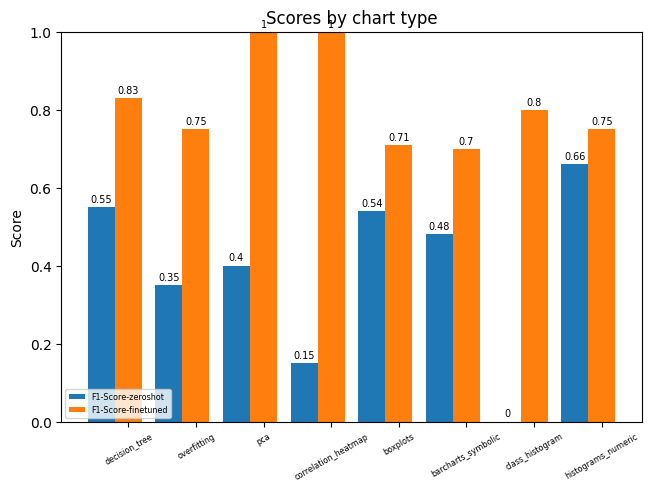

In [7]:
import matplotlib.pyplot as plt
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import gca

from matplotlib.pyplot import figure, savefig, show, subplots
from seaborn import heatmap
from numpy import array, ndarray
from matplotlib.figure import Figure

file_tag = "comparison"
import numpy as np


x = np.arange(len(types2))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2,fontsize=7)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores by chart type')
ax.set_xticks(x + width, types2)
ax.legend(loc='lower left', ncols=1,fontsize='xx-small')
ax.set_ylim(0, 1)
ax.tick_params(axis="x", labelrotation=30, labelsize="xx-small")


savefig(f"{file_tag}-type-f1score.png", bbox_inches='tight')
show()